<a href="https://colab.research.google.com/github/chandra20500/uber-movement/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1ENtSW3MmsT1xfHqd7o67rJhYrUeoyPKQ"})   # replace the id with id of file you want to access
downloaded.GetContentFile('banglore_time.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('banglore_time.csv')

In [ ]:
downloaded = drive.CreateFile({'id':"1AWZh5WuwJYMVyHqizuLFGNImv9MtWh8y"})   # replace the id with id of file you want to access
downloaded.GetContentFile('wards.JSON')   

In [ ]:
!pip install geopandas
!pip install shapely

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 18.2MB/s 
     |████████████████████████████████| 14.7MB 312kB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import requests
import shapely
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
bglr=gpd.read_file('wards.JSON')
bglr.head()

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru","MULTIPOLYGON (((77.59229 13.09720, 77.59094 13..."
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...","MULTIPOLYGON (((77.56862 13.12705, 77.57064 13..."
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...","MULTIPOLYGON (((77.59094 13.09842, 77.59229 13..."
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...","MULTIPOLYGON (((77.67683 13.01147, 77.67695 13..."
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...","MULTIPOLYGON (((77.72899 13.02061, 77.72994 13..."


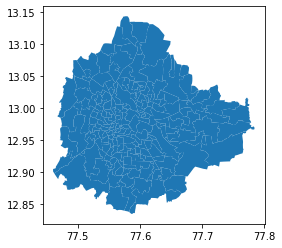

In [ ]:
bglr.plot()

In [ ]:
from geopandas import GeoSeries
from shapely.geometry import Polygon

In [ ]:
bglr_c=bglr.copy()

In [ ]:
bglr_c.geometry= bglr_c['geometry'].centroid
bglr_c.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",POINT (77.58042 13.12171)
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...",POINT (77.56004 13.10280)
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...",POINT (77.58393 13.09099)
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...",POINT (77.66957 13.00606)
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...",POINT (77.71546 13.01685)


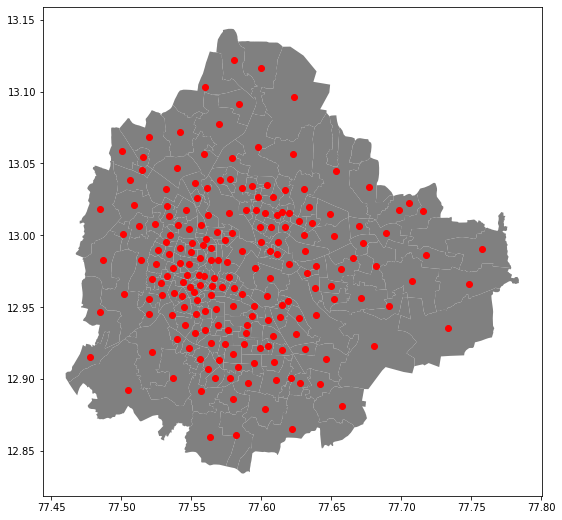

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
bglr.plot(color='grey',ax=ax)
bglr_c.plot(color='red',ax=ax)

In [ ]:
bglr_5 = bglr_c.head()
bglr_5

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",POINT (77.58042 13.12171)
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...",POINT (77.56004 13.10280)
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...",POINT (77.58393 13.09099)
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...",POINT (77.66957 13.00606)
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...",POINT (77.71546 13.01685)


In [ ]:
import geopy.distance

In [ ]:
bglr_5['dist_prev'] = 0
bglr_5.head()

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry,dist_prev
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",POINT (77.58042 13.12171),0
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...",POINT (77.56004 13.10280),0
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...",POINT (77.58393 13.09099),0
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...",POINT (77.66957 13.00606),0
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...",POINT (77.71546 13.01685),0


In [ ]:
j = 0
matrix = pd.DataFrame()
for i in bglr_5.index[:-1]:
      matrix[] = bglr_5.loc[j, 'geometry'].distance(bglr_5.loc[i+1, 'geometry'])
      j++

SyntaxError: ignored

In [ ]:
rows, cols = (5, 5) 
arr=[] 
for i in range(cols): 
    col = []
    for j in range(rows):
      temp =  bglr_5.loc[i, 'geometry'].distance(bglr_5.loc[j, 'geometry'])
      col.append(temp) 
    arr.append(col)

In [ ]:
print(arr)

[[0.0, 0.027801169333738034, 0.03092187145884794, 0.14601557220948552, 0.1709690176001336], [0.027801169333738034, 0.0, 0.026651289740539156, 0.14613425620691545, 0.1776055371126699], [0.03092187145884794, 0.026651289740539156, 0.0, 0.12060750680174391, 0.15098708015433807], [0.14601557220948552, 0.14613425620691545, 0.12060750680174391, 0.0, 0.047141153661510574], [0.1709690176001336, 0.1776055371126699, 0.15098708015433807, 0.047141153661510574, 0.0]]


In [ ]:
data = pd.DataFrame(arr)

In [ ]:
data

,0,1,2,3,4
0,0.000000,0.027801,0.030922,0.146016,0.170969
1,0.027801,0.000000,0.026651,0.146134,0.177606
2,0.030922,0.026651,0.000000,0.120608,0.150987
3,0.146016,0.146134,0.120608,0.000000,0.047141
4,0.170969,0.177606,0.150987,0.047141,0.000000


In [ ]:
df.head()

In [ ]:
x = df[['sourceid','dstid','hod','mean_travel_time']]
x.head()

,sourceid,dstid,hod,mean_travel_time
0,88,33,12,2022.22
1,163,16,14,3159.21
2,160,46,14,3943.34
3,162,26,14,3193.64
4,84,73,12,801.05


In [ ]:
x.head()

,sourceid,dstid,hod,mean_travel_time
0,88,33,12,2022.22
1,163,16,14,3159.21
2,160,46,14,3943.34
3,162,26,14,3193.64
4,84,73,12,801.05


In [ ]:
x['sourceid'] = x['sourceid'].astype(str)
x['dstid'] = x['dstid'].astype(str)
x['hod'] = x['hod'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
x.dtypes

sourceid             object
dstid                object
hod                  object
mean_travel_time    float64
dtype: object

In [ ]:
dummy_cat = ['dstid','sourceid','hod']

In [ ]:
dummies = pd.get_dummies(x[dummy_cat])
dummies.shape

(851963, 420)

In [ ]:
dummies = pd.get_dummies(x[dummy_cat], drop_first = True)
dummies.shape

(851963, 417)

In [ ]:
x.head()

,sourceid,dstid,hod,mean_travel_time,distance
0,88,33,12,2022.22,0
1,163,16,14,3159.21,0
2,160,46,14,3943.34,0
3,162,26,14,3193.64,0
4,84,73,12,801.05,0


In [ ]:
x['distance'][2] = 23

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
x.head()

,sourceid,dstid,hod,mean_travel_time,distance
0,87,32,12,2022.22,1
1,162,15,14,3159.21,1
2,159,45,14,3943.34,23
3,161,25,14,3193.64,1
4,83,72,12,801.05,1


In [ ]:
rows, cols = (198, 198) 
arr=[] 
for i in range(cols): 
    col = []
    for j in range(rows):
      temp =  bglr_c.loc[i, 'geometry'].distance(bglr_c.loc[j, 'geometry'])
      col.append(temp) 
    arr.append(col)

In [ ]:
distance = pd.DataFrame(arr)
distance.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197
0,0.000000,0.027801,0.030922,0.146016,0.170969,0.159719,0.161847,0.157106,0.175449,0.188620,0.068644,0.062844,0.049879,0.077538,0.062963,0.067877,0.045945,0.199502,0.230841,0.141183,0.167308,0.085748,0.211154,0.089570,0.099300,0.102167,0.111901,0.127263,0.154244,0.081287,0.093751,0.101827,0.100719,0.111767,0.123770,0.134127,0.144503,0.142767,0.117737,0.109690,...,0.213784,0.207378,0.211855,0.197293,0.190302,0.204622,0.241223,0.222470,0.192808,0.220609,0.228972,0.199503,0.218213,0.224702,0.221308,0.224623,0.224531,0.229818,0.233751,0.252638,0.243528,0.225647,0.221886,0.260066,0.261124,0.235935,0.262681,0.020066,0.157247,0.180439,0.201429,0.200309,0.202570,0.231491,0.211298,0.204536,0.130382,0.106107,0.203879,0.241862
1,0.027801,0.000000,0.026651,0.146134,0.177606,0.166211,0.163906,0.156211,0.173989,0.183898,0.046229,0.035695,0.063615,0.077667,0.055996,0.052535,0.027382,0.173355,0.205068,0.113483,0.140395,0.060042,0.187909,0.066613,0.077024,0.076351,0.086701,0.101751,0.128821,0.053500,0.066004,0.074157,0.073160,0.084144,0.096710,0.107779,0.117692,0.118081,0.093032,0.086433,...,0.196207,0.195540,0.197230,0.180370,0.173630,0.186763,0.241168,0.216370,0.195940,0.227427,0.232730,0.199909,0.207887,0.211121,0.203135,0.207748,0.209725,0.216805,0.222234,0.242184,0.227653,0.203837,0.202696,0.245763,0.243219,0.217937,0.243239,0.041872,0.162427,0.154871,0.185754,0.185378,0.181493,0.211407,0.194994,0.190705,0.135499,0.109930,0.201007,0.217961
2,0.030922,0.026651,0.000000,0.120608,0.150987,0.139593,0.137917,0.131052,0.149092,0.160457,0.042655,0.046111,0.039739,0.051660,0.032799,0.037455,0.020062,0.175145,0.205591,0.123259,0.145143,0.063024,0.182976,0.062827,0.071579,0.078852,0.087186,0.102673,0.129057,0.068490,0.077906,0.089591,0.082881,0.093952,0.102879,0.111024,0.122382,0.116678,0.092143,0.082603,...,0.183049,0.176776,0.180943,0.166481,0.159468,0.173948,0.215921,0.193732,0.169786,0.200824,0.206505,0.174446,0.187964,0.193865,0.190674,0.193784,0.193615,0.199050,0.203241,0.222398,0.212614,0.196391,0.191506,0.229184,0.230402,0.205251,0.232318,0.029739,0.135908,0.155198,0.170516,0.169389,0.172987,0.201394,0.180415,0.173666,0.108945,0.083451,0.176747,0.214153
3,0.146016,0.146134,0.120608,0.000000,0.047141,0.039458,0.020016,0.011975,0.030151,0.049565,0.121845,0.143751,0.101355,0.069065,0.090762,0.102320,0.122749,0.194236,0.212505,0.185412,0.183883,0.136343,0.171336,0.121063,0.117418,0.140261,0.137862,0.145674,0.157257,0.162427,0.161838,0.177337,0.159738,0.166363,0.161637,0.157316,0.168666,0.144607,0.135625,0.123851,...,0.130883,0.093775,0.111825,0.115639,0.109752,0.126408,0.095390,0.083867,0.051802,0.089672,0.088367,0.053839,0.095200,0.115891,0.140138,0.134390,0.122303,0.117104,0.113344,0.125464,0.143303,0.169545,0.147369,0.148845,0.169725,0.150030,0.180971,0.130410,0.031172,0.174171,0.110671,0.105547,0.147645,0.160774,0.121216,0.102200,0.028419,0.041804,0.059508,0.200275
4,0.170969,0.177606,0.150987,0.047141,0.000000,0.011394,0.030332,0.048360,0.051047,0.074628,0.161725,0.182162,0.121635,0.101153,0.126095,0.141299,0.157944,0.241256,0.258784,0.230917,0.230822,0.178587,0.216777,0.164228,0.161860,0.184367,0.183023,0.191775,0.204282,0.202610,0.203827,0.219246,0.202735,0.210222,0.206885,0.203486,0.215065,0.191501,0.181347,0.169216,...,0.171519,0.128063,0.149287,0.157737,0.152557,0.168408,0.083472,0.100366,0.031000,0.049865,0.060508,0.049259,0.124100,0.149541,0.180528,0.172846,0.157920,0.148836,0.141370,0.147480,0.177803,0.213095,0.188772,0.178266,0.205405,0.188561,0.218830,0.152529,0.017039,0.221281,0.151038,0.145321,0.192253,0.202210,0.160803,0.139945,0.042376,0.068082,0.070313,0.244739


In [ ]:
x['sourceid'] = x['sourceid'].astype(int)
x['dstid'] = x['dstid'].astype(int)
x.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sourceid,dstid,hod,mean_travel_time,distance
0,88,33,12,2022.22,0
1,163,16,14,3159.21,0
2,160,46,14,3943.34,0
3,162,26,14,3193.64,0
4,84,73,12,801.05,0


In [ ]:
x['sourceid'] = x['sourceid'] - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sourceid,dstid,hod,mean_travel_time,distance
0,87,33,12,2022.22,0
1,162,16,14,3159.21,0
2,159,46,14,3943.34,0
3,161,26,14,3193.64,0
4,83,73,12,801.05,0


In [ ]:
x['dstid'] = x['dstid'] - 1
x.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sourceid,dstid,hod,mean_travel_time,distance
0,87,32,12,2022.22,0
1,162,15,14,3159.21,0
2,159,45,14,3943.34,0
3,161,25,14,3193.64,0
4,83,72,12,801.05,0


In [ ]:
x['distance'] = x['distance'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for k in x.index:
  i = x['sourceid'][k]
  j = x['dstid'][k]
  x['distance'][k] = distance[i][j]
x.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,sourceid,dstid,hod,mean_travel_time,distance
0,87,32,12,2022.22,0.090622
1,162,15,14,3159.21,0.122644
2,159,45,14,3943.34,0.132051
3,161,25,14,3193.64,0.121013
4,83,72,12,801.05,0.030845


In [ ]:
x['distance'] = x['distance']*1000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x.head()

,sourceid,dstid,hod,mean_travel_time,distance
0,87,32,12,2022.22,90.621511
1,162,15,14,3159.21,122.644153
2,159,45,14,3943.34,132.050637
3,161,25,14,3193.64,121.013290
4,83,72,12,801.05,30.844938


In [ ]:
x['dstid'] = x['dstid'].astype(str)
x['sourceid'] = x['sourceid'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dummies = pd.get_dummies(x[dummy_cat], drop_first = True)
dummies.shape

(851963, 417)

In [ ]:
x.drop(dummy_cat, axis = 1, inplace = True)
x.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(851963, 2)

In [ ]:
x = pd.concat([x, dummies], axis = 1)
x.shape

(851963, 419)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(x, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
y_train = df_train.pop('mean_travel_time')
X_train = df_train

In [ ]:
y_test = df_test.pop('mean_travel_time')
X_test = df_test

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators = 150,
                                         max_depth = 2,
                                         min_samples_split = 20,
                                         learning_rate = 0.38,
                                         loss = 'ls')
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.38, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=20,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
print(r)

0.8610141969253435


In [ ]:
df_train.head()

,distance,dstid_1,dstid_10,dstid_100,dstid_101,dstid_102,dstid_103,dstid_104,dstid_105,dstid_106,dstid_107,dstid_108,dstid_109,dstid_11,dstid_110,dstid_111,dstid_112,dstid_113,dstid_114,dstid_115,dstid_116,dstid_117,dstid_118,dstid_119,dstid_12,dstid_120,dstid_121,dstid_122,dstid_123,dstid_124,dstid_125,dstid_126,dstid_127,dstid_128,dstid_129,dstid_13,dstid_130,dstid_131,dstid_132,dstid_133,...,sourceid_84,sourceid_85,sourceid_86,sourceid_87,sourceid_88,sourceid_89,sourceid_9,sourceid_90,sourceid_91,sourceid_92,sourceid_93,sourceid_94,sourceid_95,sourceid_96,sourceid_97,sourceid_98,sourceid_99,hod_1,hod_10,hod_11,hod_12,hod_13,hod_14,hod_15,hod_16,hod_17,hod_18,hod_19,hod_2,hod_20,hod_21,hod_22,hod_23,hod_3,hod_4,hod_5,hod_6,hod_7,hod_8,hod_9
84258,16.146140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
156245,143.930662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
315131,77.500863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
717335,37.644103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778883,119.907351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
